In [39]:
!pip install yfinance
!pip install requests
!pip install beautifulsoup4
!pip install pandas
!pip install matplotlib

In [45]:
import yfinance as yf
import pandas as pd

tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-01-01')
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date      Close       High        Low       Open     Volume
Ticker                  TSLA       TSLA       TSLA       TSLA       TSLA
0      2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
1      2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2      2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
3      2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
4      2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500


In [53]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
response = requests.get(url, headers=headers)

# Kiểm tra mã trạng thái
if response.status_code != 200:
    print(f"Lỗi: Không thể truy cập trang web. Mã trạng thái: {response.status_code}")
else:
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all('table')

    # Kiểm tra số lượng bảng
    if len(tables) == 0:
        print("Không tìm thấy bảng nào trong trang web.")
    else:
        print(f"Số lượng bảng tìm thấy: {len(tables)}")
        for i, table in enumerate(tables):
            print(f"Bảng {i}:")
            print(pd.read_html(str(table))[0].head())

        # Giả sử bảng bạn cần là bảng đầu tiên (index 0)
        tesla_revenue = pd.read_html(str(tables[0]))[0]
        tesla_revenue.columns = ['Date', 'Revenue']
        print(tesla_revenue.tail())

Số lượng bảng tìm thấy: 6
Bảng 0:
   Tesla Annual Revenue (Millions of US $)  \
0                                     2024   
1                                     2023   
2                                     2022   
3                                     2021   
4                                     2020   

  Tesla Annual Revenue (Millions of US $).1  
0                                   $97,690  
1                                   $96,773  
2                                   $81,462  
3                                   $53,823  
4                                   $31,536  
Bảng 1:
  Tesla Quarterly Revenue (Millions of US $)  \
0                                 2024-12-31   
1                                 2024-09-30   
2                                 2024-06-30   
3                                 2024-03-31   
4                                 2023-12-31   

  Tesla Quarterly Revenue (Millions of US $).1  
0                                      $25,707  
1                 

C:\Users\ACER\AppData\Local\Temp\ipykernel_3528\4149816234.py:25: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  print(pd.read_html(str(table))[0].head())
C:\Users\ACER\AppData\Local\Temp\ipykernel_3528\4149816234.py:25: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  print(pd.read_html(str(table))[0].head())
C:\Users\ACER\AppData\Local\Temp\ipykernel_3528\4149816234.py:25: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  print(pd.read_html(str(table))[0].head())
C:\Users\ACER\AppData\Local\Temp\ipykernel_3528\4149816234.py:25: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future 

In [55]:
import yfinance as yf
import pandas as pd

gme_data = yf.download('GME', start='2020-01-01', end='2023-01-01')
gme_data.reset_index(inplace=True)
print(gme_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date   Close    High     Low    Open    Volume
Ticker                GME     GME     GME     GME       GME
0      2020-01-02  1.5775  1.6175  1.5175  1.5350  17814400
1      2020-01-03  1.4700  1.5625  1.4600  1.5525  14175600
2      2020-01-06  1.4625  1.4775  1.4000  1.4500  13579200
3      2020-01-07  1.3800  1.4575  1.3600  1.4425  20912000
4      2020-01-08  1.4300  1.4625  1.3525  1.3725  22517600


In [69]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
tables = soup.find_all('table')

# Kiểm tra số lượng bảng
print(f"Số lượng bảng tìm thấy: {len(tables)}")

# Kiểm tra từng bảng để tìm bảng chứa dữ liệu doanh thu
for i, table in enumerate(tables):
    print(f"Bảng {i}:")
    print(pd.read_html(str(table))[0].head())

# Sửa lại mã để truy cập đúng bảng
if len(tables) > 0:
    gme_revenue = pd.read_html(str(tables[0]))[0]
    gme_revenue.columns = ['Date', 'Revenue']
    print("5 hàng cuối cùng của gme_revenue:")
    print(gme_revenue.tail())
else:
    print("Không tìm thấy bảng nào trong trang web.")
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
response = requests.get(url, headers=headers)

Số lượng bảng tìm thấy: 0
Không tìm thấy bảng nào trong trang web.


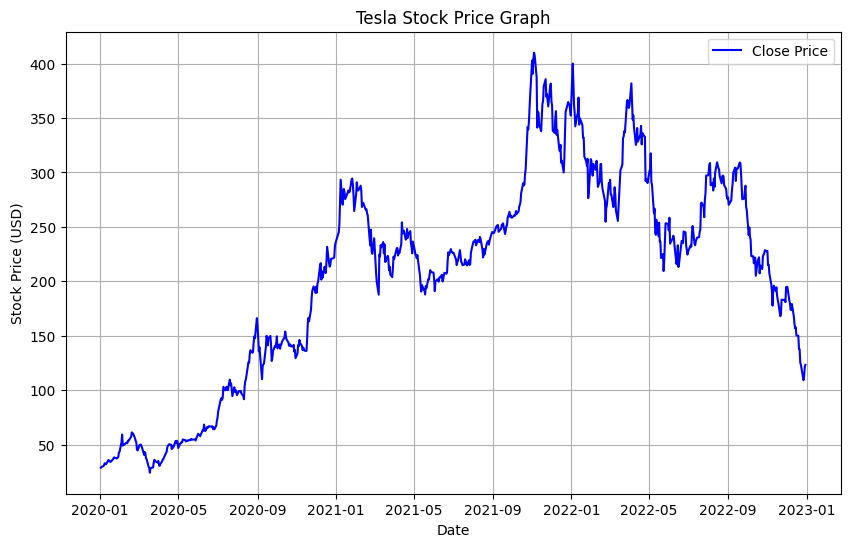

In [71]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

make_graph(tesla_data, 'Tesla Stock Price Graph')

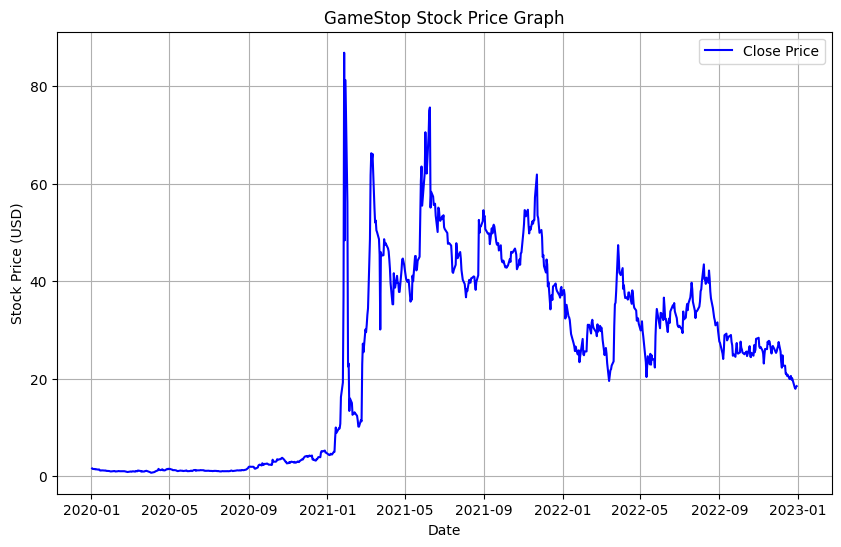

In [73]:
make_graph(gme_data, 'GameStop Stock Price Graph')